# Dockless Vehicle Trip Data

In [1]:
import shapely, geopandas, matplotlib 
import matplotlib.pyplot as plt

In [2]:
austin = geopandas.GeoDataFrame.from_file('/home/jovyan/work/data/census_tracts_2010_msa/census_tracts_2010_msa.shp',)
austin.head()
austin.crs

{'init': 'epsg:2277'}

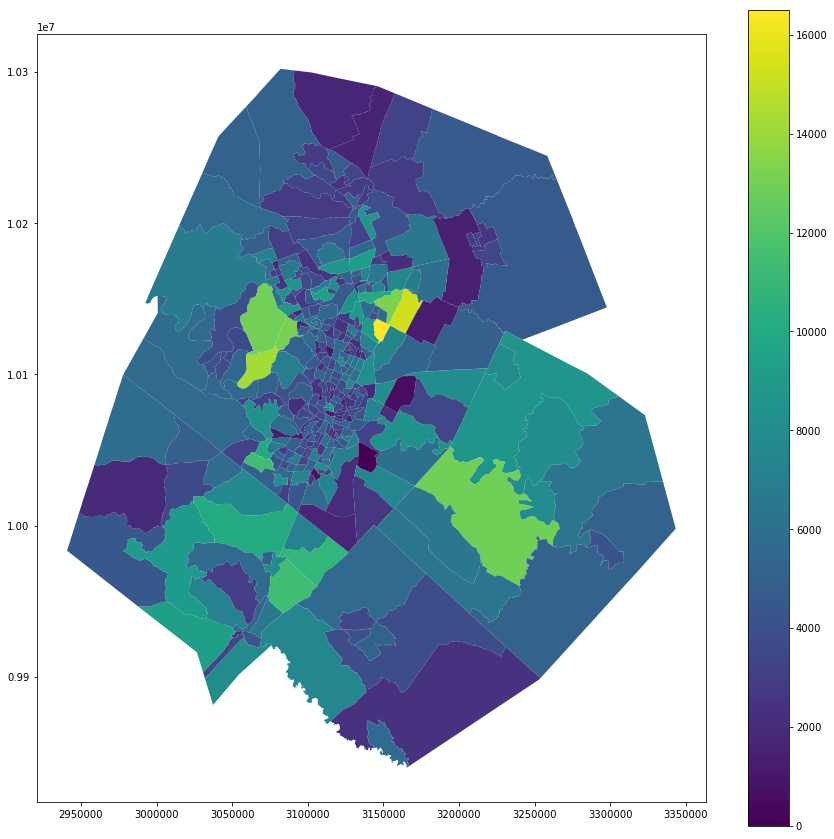

In [3]:
fig, ax = plt.subplots(figsize=(15,15))
austin.plot(column = 'SUM_totpop', ax = ax, legend=True)
plt.show()

In [4]:
import pandas as pd 

scooter_data = pd.read_csv('~/work/data/Dockless_Vehicle_Trips.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
scooter_data = scooter_data.dropna(subset=['Census Tract Start'])

In [6]:
scooter_data['Census Tract Start'].value_counts().idxmax()

'48453001100'

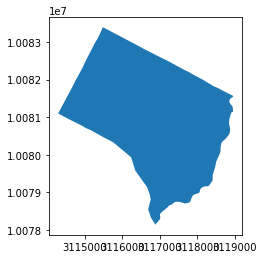

In [7]:
austin[austin['TRACTCE10']=='000500']['geometry'].plot()

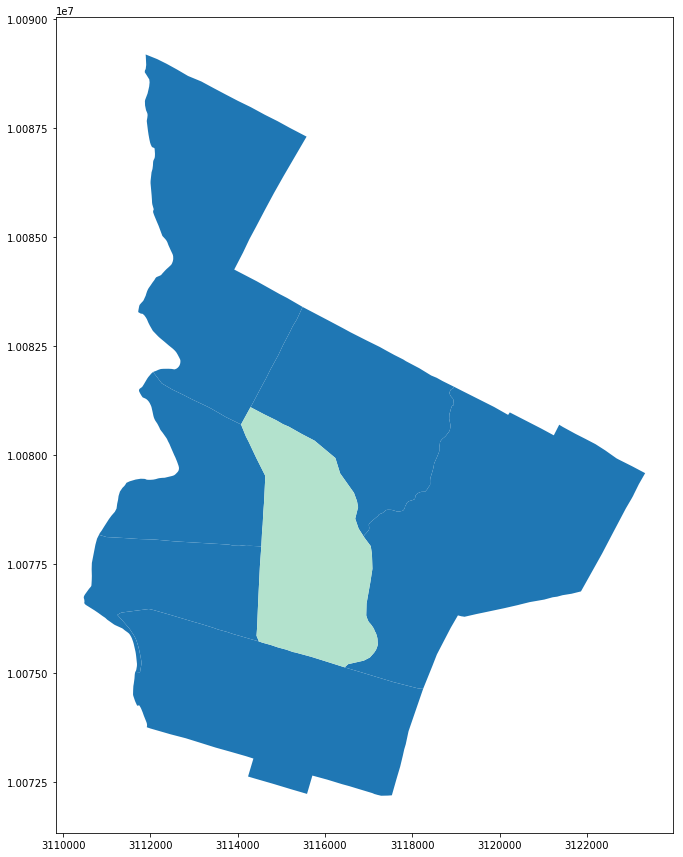

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
oncampus  = ['000601']
offcampus = ['000603', '000604', '000700', '000401', '000500', '000204']
austin[austin['TRACTCE10'].isin(offcampus)].plot(ax = ax)
austin[austin['TRACTCE10'].isin(oncampus)].plot(ax = ax, cmap='Pastel2')

In [9]:
scooter_data.head()

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End
2,aa27d854-9f27-456e-ae49-f268a9b2b533,6b90a827-60a1-47ad-94a4-d33654dbd50d,scooter,170.0,0.0,04/29/2019 05:30:00 PM,04/29/2019 05:30:00 PM,04/30/2019 06:45:17 AM,4.0,17.0,1.0,9.0,9.0,2019.0,4.8453e+10,4.8453e+10
3,b7c9f133-966b-46f1-91ce-2682ce7fcf50,1e5234a3-e86b-41e1-a1ad-e98310f3a71c,scooter,90.0,0.0,04/29/2019 05:30:00 PM,04/29/2019 05:30:00 PM,04/30/2019 06:45:17 AM,4.0,17.0,1.0,9.0,9.0,2019.0,4.8453e+10,4.8453e+10
4,1d4f5d89-c044-46cb-8674-80d37fa0371f,caa0325c-7c0b-4909-a573-d83126ecc953,scooter,570.0,826.0,04/29/2019 05:15:00 PM,04/29/2019 05:15:00 PM,04/30/2019 06:45:17 AM,4.0,17.0,1.0,9.0,9.0,2019.0,4.8453e+10,4.8453e+10
5,cd442fb9-058f-46a7-af90-b4adb56fd163,1653cf10-75f5-4934-a9d9-c8d43ade67a9,scooter,438.0,1815.0,04/29/2019 05:30:00 PM,04/29/2019 05:45:00 PM,04/30/2019 06:45:17 AM,4.0,17.0,1.0,9.0,9.0,2019.0,4.8453e+10,4.8453e+10
6,e1ac0e42-ab2d-4eac-b019-f085169c1d38,1d89f9e2-d01a-4736-b7d8-258cb9a2108c,scooter,391.0,1519.0,04/29/2019 05:30:00 PM,04/29/2019 05:30:00 PM,04/30/2019 06:45:17 AM,4.0,17.0,1.0,9.0,9.0,2019.0,4.8453e+10,4.8453e+10


In [10]:
time_freq = scooter_data[scooter_data['Day of Week'] == 3].groupby(['Hour'])['Hour'].agg('count').to_frame('count').reset_index()

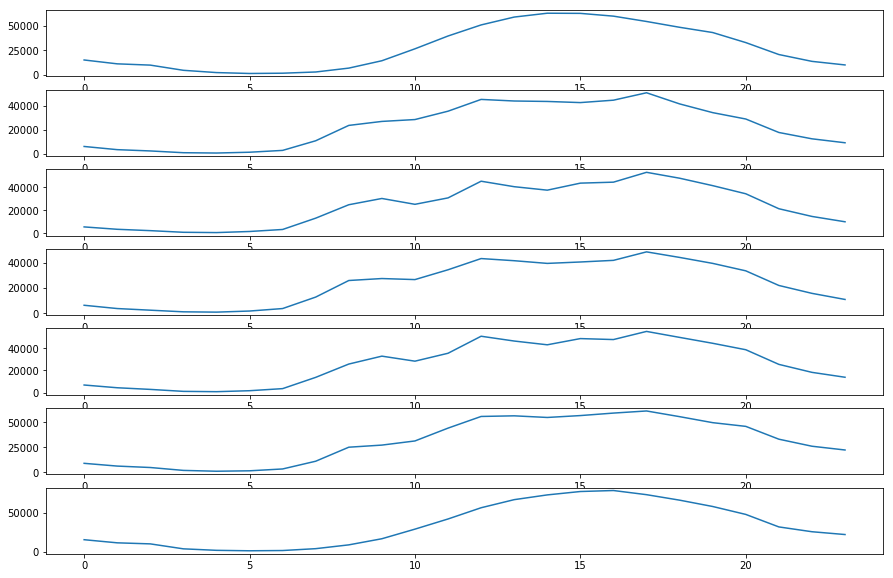

In [13]:
fig, ax = plt.subplots(7, 1,figsize=(15, 10))
for i in range(7): # 0 = sunday, 6 = saturday

    time_freq = scooter_data[scooter_data['Day of Week'] == i].groupby(['Hour'])['Hour'].agg('count').to_frame('count').reset_index()
    ax[i].plot(time_freq['Hour'], time_freq['count'])


In [14]:
day_freq = scooter_data.groupby(['Day of Week'])['Day of Week'].agg('count').to_frame('count').reset_index()
day_freq

,Day of Week,count
0,0.0,656172
1,1.0,556689
2,2.0,577789
3,3.0,566167
4,4.0,639356
5,5.0,741429
6,6.0,824060


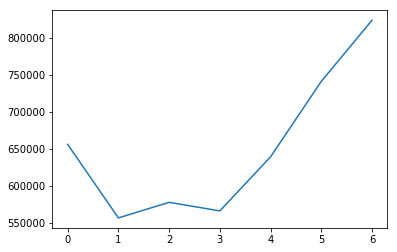

In [15]:
fig, ax = plt.subplots()
ax.plot(day_freq['Day of Week'], day_freq['count'])

# Weather Data

In [16]:
weather_data = pd.read_csv('~/work/data/austin_weather.csv')
print(weather_data.dtypes)
weather_data.head()

Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [17]:
print(scooter_data['Start Time'].min())
print(scooter_data['Start Time'].max())

01/01/2019 01:00:00 AM
12/31/2018 12:45:00 PM


# Testing Bayesian Network Library

In [18]:
from pomegranate import *

ModuleNotFoundError: No module named 'pomegranate'

In [19]:
guest = DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})
prize = DiscreteDistribution({'A': 1./3, 'B': 1./3, 'C': 1./3})
monty = ConditionalProbabilityTable([
         ['A', 'A', 'A', 0.0],
         ['A', 'A', 'B', 0.5],
         ['A', 'A', 'C', 0.5],
         ['A', 'B', 'A', 0.0],
         ['A', 'B', 'B', 0.0],
         ['A', 'B', 'C', 1.0],
         ['A', 'C', 'A', 0.0],
         ['A', 'C', 'B', 1.0],
         ['A', 'C', 'C', 0.0],
         ['B', 'A', 'A', 0.0],
         ['B', 'A', 'B', 0.0],
         ['B', 'A', 'C', 1.0],
         ['B', 'B', 'A', 0.5],
         ['B', 'B', 'B', 0.0],
         ['B', 'B', 'C', 0.5],
         ['B', 'C', 'A', 1.0],
         ['B', 'C', 'B', 0.0],
         ['B', 'C', 'C', 0.0],
         ['C', 'A', 'A', 0.0],
         ['C', 'A', 'B', 1.0],
         ['C', 'A', 'C', 0.0],
         ['C', 'B', 'A', 1.0],
         ['C', 'B', 'B', 0.0],
         ['C', 'B', 'C', 0.0],
         ['C', 'C', 'A', 0.5],
         ['C', 'C', 'B', 0.5],
         ['C', 'C', 'C', 0.0]], [guest, prize])

NameError: name 'DiscreteDistribution' is not defined

In [20]:
s1 = Node(guest, name="guest")
s2 = Node(prize, name="prize")
s3 = Node(monty, name="monty")

NameError: name 'Node' is not defined

In [21]:
model = BayesianNetwork("Monty Hall Problem")
model.add_states(s1, s2, s3)
model.add_edge(s1, s3)
model.add_edge(s2, s3)
model.bake()

NameError: name 'BayesianNetwork' is not defined

In [22]:
print(model.predict([['A', 'B', None],
                         ['A', 'C', None],
                         ['C', 'B', None]]))


NameError: name 'model' is not defined

## Testing Sampling in Tracts

In [23]:
tract_to_name = {
    '000204': "Triangle",
    '000500': "North Campus",
    '000700': "South Campus",
    '000401': "East Campus",
    '000604': "Lower West Campus",
    '000603': "Upper West Campus",
    '000601': "Campus"
}

tract_to_index = {
    '000204': 0,
    '000500': 1,
    '000700': 2,
    '000401': 3,
    '000604': 4,
    '000603': 5,
    '000601': 6,
}

## Cleaning the Data

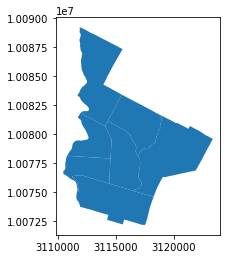

In [24]:
geometries = austin[austin['TRACTCE10'].isin(tract_to_name.keys())]['geometry']
geometries.plot()

In [26]:
for tract in tract_to_index.keys():
    print(geometries.iloc[tract_to_index[tract]].centroid)

POINT (3113457.561795017 10084957.61189754)
POINT (3119741.597699587 10078222.10909902)
POINT (3116798.32603624 10080996.21137355)
POINT (3115650.402855188 10077822.12176338)
POINT (3113016.212515796 10079427.13600723)
POINT (3112610.817756496 10077068.20757984)
POINT (3114762.938685594 10074268.42578505)


## Converting from 

In [50]:
from pyproj import Proj, transform

def convert_to_lat_long(x, y):
    new = Proj(init='EPSG:4326')
    original = Proj(init='EPSG:2277', preserve_units=True)
    n_x, n_y = transform(original, new, x, y)
    return Point(n_x, n_y)
                 
def convert_from_lat_long(x, y):
    new = Proj(init='EPSG:2277', preserve_units=True)
    original = Proj(init='EPSG:4326')
    n_x, n_y = transform(original, new, x, y)
    
    return Point(n_x, n_y)
    

In [71]:
# Test latitude 30.284338, -97.744712
from shapely.geometry import Point
p = Point(30.284338, -97.744712)
p = convert_from_lat_long(p.y, p.x)
print(geometries.iloc[tract_to_index['000601']].distance(p)> 20)

True
